# LAB 11: CORRELATION and REGRESSION

## QUESTION 1

The built-in dataset **mtcars** shows several characteristics of 32 different cars. It has 11 columns, but we will only be dealing with the first 6.

1) Assign the first 6 columns of **mtcars** to a new data frame called **mtcars_new**.

Let's inspect our dataset:

```R
> head(mtcars_new)
                   mpg cyl disp  hp drat    wt
Mazda RX4         21.0   6  160 110 3.90 2.620
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875
Datsun 710        22.8   4  108  93 3.85 2.320
Hornet 4 Drive    21.4   6  258 110 3.08 3.215
Hornet Sportabout 18.7   8  360 175 3.15 3.440
Valiant           18.1   6  225 105 2.76 3.460
```

- **mpg** is a fuel consumption metric and it stands for miles-per-gallon. 
- **cyl** shows the number of cylinders the car engine has.
- **disp** stands for displacement and it shows the combined volume of all cylinders.
- **hp** stands for horsepower and it's a measure of strength for engines.
- **drat** shows the real axle ratio.
- **wt** shows the 1/4 mile time of the car (how fast it travels quarter of a mile starting from standstill).

2) Compute the correlations between each pair of these variables and store them in a matrix called **cor_matrix**. Round the correlations to the third decimal place. 

```R
> cor_matrix

        mpg    cyl   disp     hp   drat     wt
mpg   1.000 -0.852 -0.848 -0.776  0.681 -0.868
cyl  -0.852  1.000  0.902  0.832 -0.700  0.782
disp -0.848  0.902  1.000  0.791 -0.710  0.888
hp   -0.776  0.832  0.791  1.000 -0.449  0.659
drat  0.681 -0.700 -0.710 -0.449  1.000 -0.712
wt   -0.868  0.782  0.888  0.659 -0.712  1.000
```

3) Sort these correlations from largest to smallest with respect to their absolute value. Discount the correlations between the same variables. Then store them in a data frame called **sorted_cor** which shows the correlations in its first column and to which pair the correlation belongs to in its second column. **sorted_cor** should not have duplicate entries.

```R
> sorted_cor

   correlation      pair
6        0.902  cyl-disp
12       0.888   disp-wt
5       -0.868    mpg-wt
1       -0.852   mpg-cyl
2       -0.848  mpg-disp
7        0.832    cyl-hp
10       0.791   disp-hp
9        0.782    cyl-wt
3       -0.776    mpg-hp
15      -0.712   drat-wt
11      -0.710 disp-drat
8       -0.700  cyl-drat
4        0.681  mpg-drat
14       0.659     hp-wt
13      -0.449   hp-drat
```

## SOLUTION 1

## QUESTION 2

1) Write a function called **best_model** that will;

- Take a data frame **df** as its only argument
- Check the correlations between the variable in the last column and rest of the variables
- Fit a linear model whose dependent variable is the variable in the last column and whose independent variable is the variable that has the highest absolute correlation with the dependent variable
- Return a scatter plot of these two variables which also shows the fitted line of the linear model in red along with the coefficients of the model
- Name of the x-axis should be the name of the independent variable and name of the y-axis should be the name of the dependent variable
- Title of the plot should be **"Linear Regression Between ... and ..."**. Fill in the blanks with the names of the dependent and independent variables respectively

*Hint: You can call the coefficients of a linear model with ``$coefficients``.* 

2) Try your function with the **Boston** data set built into the **MASS** library as such:

```R
> install.packages("MASS")
> library(MASS)
> best_model(Boston)

(Intercept)       lstat 
 34.5538409  -0.9500494 
```

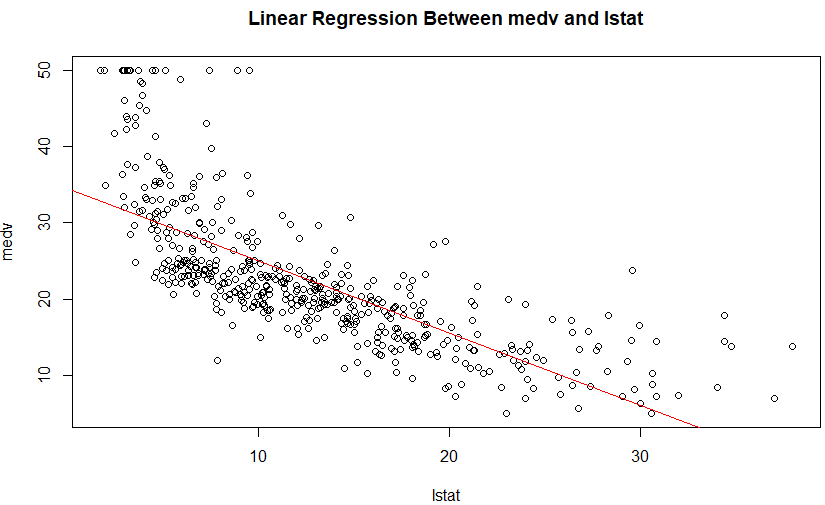

## SOLUTION 2

## QUESTION 3

1) Write a function called **linearmodel** whose only argument is a data frame **df** with two columns. **linearmodel** should regress the second column of **df** on its first column and return a string giving the formula with the parameters of the model. Your function should round the coefficients to the third decimal place.

Now, try your function with the built-in **cars** dataset:

```R
> linearmodel(cars)

[1] "y = -17.579 + 3.932*x"
```

2) Generalize your function so that it accepts dataframes with any number of columns. Call it **linearmodel2**. Your function should regress the last column of **df** onto its remaining columns and return a string giving the formula with the parameters of the model as shown below:

```R
> linearmodel2(mtcars_new)

[1] "y =  5.339 - 0.086*x_1 - 0.15*x_2 + 0.006*x_3 - 0.002*x_4 - 0.142*x_5"
```

## SOLUTION 3

## QUESTION 4

Predictions are usually evaluated with the Mean Squared Error (MSE) criterion, which is the mean of squared differences between observed and predicted values.

For this question we will continue working with the **Boston** data set. 

Let's see the dimensions of our data set:

```R
> dim(Boston)

[1] 506  14
```
So we have 506 observations and 14 variables.

1) We only need certain variables to solve this question. Assign the variables **crim**, **nox**, **rm**, **age**, **dis**, **lstat** and **medv** to a new data frame called **boston_new**. Then split **boston_new** into two parts: 

- First part will be called **train** and it will have the first 450 observations. 
- Second part will be called **test** and it will have the remaining 56 observations.

```R
> head(boston_new)

     crim   nox    rm  age    dis lstat medv
1 0.00632 0.538 6.575 65.2 4.0900  4.98 24.0
2 0.02731 0.469 6.421 78.9 4.9671  9.14 21.6
3 0.02729 0.469 7.185 61.1 4.9671  4.03 34.7
4 0.03237 0.458 6.998 45.8 6.0622  2.94 33.4
5 0.06905 0.458 7.147 54.2 6.0622  5.33 36.2
6 0.02985 0.458 6.430 58.7 6.0622  5.21 28.7

> head(train)

     crim   nox    rm  age    dis lstat medv
1 0.00632 0.538 6.575 65.2 4.0900  4.98 24.0
2 0.02731 0.469 6.421 78.9 4.9671  9.14 21.6
3 0.02729 0.469 7.185 61.1 4.9671  4.03 34.7
4 0.03237 0.458 6.998 45.8 6.0622  2.94 33.4
5 0.06905 0.458 7.147 54.2 6.0622  5.33 36.2
6 0.02985 0.458 6.430 58.7 6.0622  5.21 28.7

> head(test)

       crim   nox    rm  age    dis lstat medv
451 6.71772 0.713 6.749 92.6 2.3236 17.44 13.4
452 5.44114 0.713 6.655 98.2 2.3552 17.73 15.2
453 5.09017 0.713 6.297 91.8 2.3682 17.27 16.1
454 8.24809 0.713 7.393 99.3 2.4527 16.74 17.8
455 9.51363 0.713 6.728 94.1 2.4961 18.71 14.9
456 4.75237 0.713 6.525 86.5 2.4358 18.13 14.1
```

We will use **train** to build our models and **test** to compare them.

2) Using the training data, regress **medv** on all the remaining variables individually and store the models in a list called **boston_models**. Names of the elements in **boston_models** should be the names of the independent variables.

```R
> boston_models

$crim

Call:
lm(formula = paste("medv ~", i), data = train)

Coefficients:
(Intercept)         crim  
    24.5062      -0.4173  


$nox

Call:
lm(formula = paste("medv ~", i), data = train)

Coefficients:
(Intercept)          nox  
      41.02       -32.88 

.
.
.
```

3) Using the testing data and models in **boston_models**, make predictions for **medv**. Store these predictions in a data frame called **pred_boston** which should have 56 rows and 7 columns. Rows represent observations and columns represent the variables used in making the predictions. Last column should have the actual values of **medv** and column names of **pred_boston** should be the same as the column names of **boston_new**.


```R
> head(pred_boston)

        crim      nox       rm      age      dis    lstat medv
451 21.70305 17.57466 27.20265 20.07825 21.46867 18.18076 13.4
452 22.23574 17.57466 26.32867 19.42142 21.49950 17.90408 15.2
453 22.38219 17.57466 23.00013 20.17208 21.51219 18.34296 16.1
454 21.06447 17.57466 33.19032 19.29240 21.59464 18.84862 17.8
455 20.53640 17.57466 27.00740 19.90231 21.63698 16.96909 14.9
456 22.52314 17.57466 25.11998 20.79373 21.57815 17.52245 14.1
```

*Hint: You can make predictions with the ``predict()`` function.*

4) Calculate the average prediction error for every model using **pred_boston** and store them in a vector called **pred_error**. For the best model, construct a line plot that shows both the fitted and real values of **medv**. Color of the fitted values should be red and color of the real values must be blue. Title of the plot should be **"Fitted vs Real Values of medv"**. Also add a legend to your plot that shows which line belongs to which series.

```R
> pred_error

     crim       nox        rm       age       dis     lstat 
2092.9413 1153.4926 1875.6298 1281.5110 1554.8061  832.2176 
```

Your plot should look like this:

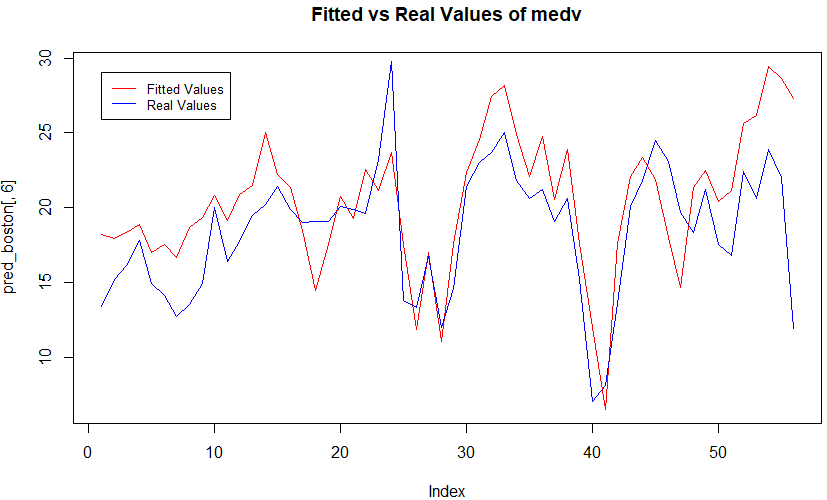

*Hint: You can add a legend to your plot with the ``legend()`` function.*

## SOLUTION 4